# **Train Keras Models Using the Genetic Algorithm with PyGAD**
![](https://images.saasworthy.com/gradientbypaperspace_4392_logo_1570797115_mkedo.png)

## Why use the **Genetic Algorithm** rather than **Gradient-Based Algorithms**?

1. The genetic algorithm can work with **non-diffrentiable** and **non-convex** functions. This is compared to the gradient descent-based algorithms that usually work with diffrentiable convex functions. 
2. The genetic algorithm does not suffer from **vanishing** or **exploding gradients**. The reason is that the genetic algorithm updates the parameters of all layers at once, compared to updating layer by layer in the gradient-based algorithms.

## Install PyGAD

PyGAD is an open-source Python library for building the genetic algorithm and training machine learning algorithms. It supports Keras and PyTorch models.

GitHub: https://github.com/ahmedfgad/GeneticAlgorithmPython

Documentation: https://pygad.readthedocs.io

### Verify PyGAD Installation

In [1]:
import pygad

print(pygad.__version__)

2.16.0


## Install TensorFlow

I am using a free Gradient instance that offers a free GPU. Thus, TensorFlow-GPU is installed.

## Import TensorFlow

In [2]:
import tensorflow

print(tensorflow.__version__)

2.1.0


In [3]:
import numpy

## Optimization Example

Y = w1**X1** + w2**X2** + w3**X3** + w4**X4**

For:
1. Input vector `X=[4, -1, 0.3, 7.2]`
2. Output `Y=9`

What are the values for the weights `w1` to `w4`?

The genetic algorithm can be used to find the values of these weights.

## Optimization using PyGAD
1. Define the fitness function.
2. Create an instance of the `pygad.GA` class.
3. Call the `run()` method.
4. Plot the results.
4. Print some information about the best solution.

https://pygad.readthedocs.io

### 1. Fitness Function

The fitness function in PyGAD is a normal Python function that accepts 2 parameters:
1. Solution evolved using the genetic algorithm.
2. The index of the solution within the population.

The fitness function must be a **maximization function**.

Y = w1**X1** + w2**X2** + w3**X3** + w4**X4**

In [4]:
X = [4, -1, 0.3, 7.2]
function_inputs = X
Y = 9

# Y = w1X1 + w2X2 + w3X3 + w4X4

def fitness_func(solution, solution_idx):

    # SOP between each w and X.
    output = numpy.sum(solution*X)

    error = numpy.abs(output - Y)

    # The error may be 0.
    fitness = 1.0 / ( error + 0.000001)

    return fitness

### 2. Instantiating the `pygad.GA` class.

Check information about all the parameters in the `pygad.GA` class constructor: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class 

In [5]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       sol_per_pop=20,
                       num_genes=len(function_inputs), # 4 in this example
                       suppress_warnings=True)

### 3. Call the `run()` Method

The `pygad.GA` class has a method called `run()` which starts the optimization.

In [6]:
ga_instance.run()

### 4. Plot the Results

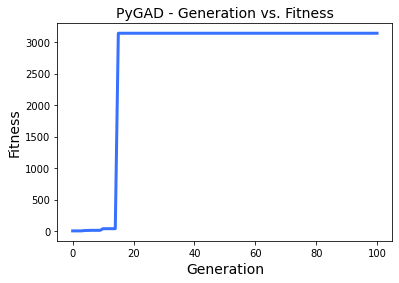

In [7]:
fig = ga_instance.plot_result()

### 5. Information about the Best Solution

1. The values of the 4 weights.
2. The fitness value of the best solution.
3. The estimated output using the best solution.
4. The number of generations used to reach the best solution?

There is a method called `best_solution()` that returns the best solution and its fitness value.

In [8]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")
print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end="\n\n")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution:\n{prediction}".format(prediction=prediction), end="\n\n")

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Parameters of the best solution:
[-2.53764954  0.68034785  1.16888205  2.70563872]

Fitness value of the best solution:
3140.844900904789

Predicted output based on the best solution:
9.000317385667408

Best fitness value reached after 15 generations.


### Complete Code

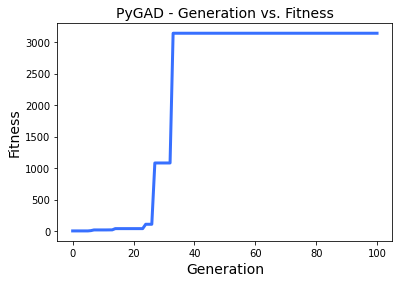

Parameters of the best solution:
[ 1.07373277 -3.57078505  4.30814611 -0.02192258]

Fitness value of the best solution:
3140.3249811346936

Predicted output based on the best solution:
9.000317438380106

Best fitness value reached after 33 generations.


In [9]:
import pygad
import numpy

X = [4, -1, 0.3, 7.2]
Y = 9

# Y = w1X1 + w2X2 + w3X3 + w4X4

def fitness_func(solution, solution_idx):

    # SOP between each w and X.
    output = numpy.sum(solution*X)

    error = numpy.abs(output - Y)

    # The error may be 0.
    fitness = 1.0 / ( error + 0.000001)

    return fitness

ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       sol_per_pop=20,
                       num_genes=len(function_inputs), # 4 in this example
                       suppress_warnings=True)

ga_instance.run()

fig = ga_instance.plot_result()

solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")
print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end="\n\n")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution:\n{prediction}".format(prediction=prediction), end="\n\n")

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

## Keras Models Optimization with PyGAD
1. Prepare the training data
2. Build the Keras model
3. Create an instance of the `pygad.kerasga.KerasGA` Class
4. Build the fitness function
5. Create an instance of the `pygad.GA` class
6. Call the `run()` method
7. Plot results
8. Information about the best solution
9. Use the trained model to make predictions
10. Evaluate the model by calculating the error

### 1. Training Data

This is a regression example.

Random data of 4 samples are used. 

Each sample has 3 inputs and 1 output.

In [10]:
# Data inputs
data_inputs = numpy.array([[0.02, 0.1, 0.15],
                           [0.7, 0.6, 0.8],
                           [1.5, 1.2, 1.7],
                           [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = numpy.array([[0.1],
                            [0.6],
                            [1.3],
                            [2.5]])

### 2. Build the Keras Model
The last layer uses a **linear** activation function because this is a regression example.

In [11]:
input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

#### Model Summary
The model has 26 trainable parameters.

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### 3. Instantiate the `pygad.kerasga.KerasGA` Class
PyGAD has a module called `kerasga` which helps to retrieve the Keras model parameters.
https://pygad.readthedocs.io/en/latest/README_pygad_kerasga_ReadTheDocs.html

This module has a class named `KerasGA` where its constructor accepts 2 parameters:
1. Keras model.
2. Number of solutions in the population.

In [13]:
import pygad.kerasga

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

### 4. Build the Fitness Function

The fitness function measures the error of the Keras model.

Remember that the fitness function must be a maximization function.

The steps to calculate the fitness value are:
1. `model_weights_as_matrix()`: Use the helper function `model_weights_as_matrix()` to convert the solution into the form expected by the Keras model.
2. `set_weights()`: Set the new parameters as the model weights using the `set_weights()` Keras method.
3. `predict()`: Return the model predictions over the training data.
4. Calculate the error between the model predictions and the correct outputs.
5. Calculate the fitness value from the error.

In [14]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

In [15]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

### 5. Instantiate the `pygad.GA` Class
Two new parameters are used:
1. `initial_population`: The initial population.
2. `on_generation`: A callback function that is called after each generation.

In [16]:
ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

### 6. Run the Genetic Algorithm
Call the `run()` method.

In [17]:
ga_instance.run()

Generation = 1
Fitness    = 12.515057693383309

Generation = 2
Fitness    = 12.515057693383309

Generation = 3
Fitness    = 12.515057693383309

Generation = 4
Fitness    = 12.515057693383309

Generation = 5
Fitness    = 12.515057693383309

Generation = 6
Fitness    = 12.515057693383309

Generation = 7
Fitness    = 12.515057693383309

Generation = 8
Fitness    = 12.515057693383309

Generation = 9
Fitness    = 12.515057693383309

Generation = 10
Fitness    = 21.22353004560009

Generation = 11
Fitness    = 21.22353004560009

Generation = 12
Fitness    = 21.22353004560009

Generation = 13
Fitness    = 21.22353004560009

Generation = 14
Fitness    = 21.22353004560009

Generation = 15
Fitness    = 21.22353004560009

Generation = 16
Fitness    = 21.22353004560009

Generation = 17
Fitness    = 21.22353004560009

Generation = 18
Fitness    = 21.22353004560009

Generation = 19
Fitness    = 21.22353004560009

Generation = 20
Fitness    = 21.22353004560009

Generation = 21
Fitness    = 21.22353004

Generation = 170
Fitness    = 88.12603897308074

Generation = 171
Fitness    = 88.12603897308074

Generation = 172
Fitness    = 88.12603897308074

Generation = 173
Fitness    = 88.12603897308074

Generation = 174
Fitness    = 88.12603897308074

Generation = 175
Fitness    = 88.12603897308074

Generation = 176
Fitness    = 94.74739811115612

Generation = 177
Fitness    = 94.74739811115612

Generation = 178
Fitness    = 94.74739811115612

Generation = 179
Fitness    = 94.74739811115612

Generation = 180
Fitness    = 94.74739811115612

Generation = 181
Fitness    = 94.74739811115612

Generation = 182
Fitness    = 94.74739811115612

Generation = 183
Fitness    = 94.74739811115612

Generation = 184
Fitness    = 94.74739811115612

Generation = 185
Fitness    = 94.74739811115612

Generation = 186
Fitness    = 94.74739811115612

Generation = 187
Fitness    = 94.74739811115612

Generation = 188
Fitness    = 94.74739811115612

Generation = 189
Fitness    = 94.74739811115612

Generation = 190
Fit

### 7. Plot Results

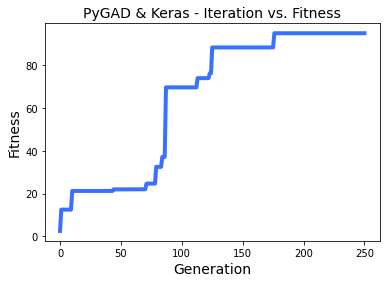

In [18]:
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

### 8. Information about the Best Solution

In [19]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

Parameters of the best solution:
[-2.68211085 -0.14912699  0.95860479  0.95109184  1.38537621  0.93297967
  1.8852536   0.03354026 -2.07325206  0.63873095  1.51188864 -0.35509692
  0.78257316 -0.06872156 -0.46025705 -0.98620337  0.          0.
  0.27414451  0.          0.15272993 -0.71161127  0.23183584  1.84869024
  0.81821632  0.        ]

Length of the solution is: 26

Fitness value of the best solution:
94.74739811115612



### 9. Make Prediction
Use the trained model to make predictions.

The steps are covered in the fitness function.
1. Use the `model_weights_as_matrix()` to formulate the Keras model parameters.
2. Set the parameters as the current model weights by calling the `set_weights()` method.
3. Make prediction using the `predict()` method.

In [20]:
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

Predictions:
 [[0.09638714]
 [0.5826485 ]
 [1.3172395 ]
 [2.5040135 ]]

Correct Outputs:
 [[0.1]
 [0.6]
 [1.3]
 [2.5]]



### 10. Measure the Loss
The mean abolute error (MAE) is used.

In [21]:
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

Absolute Error:
 0.01055437


### Complete Code for Regression Example

Generation = 1
Fitness    = 1.962279577769006

Generation = 2
Fitness    = 3.291109146200602

Generation = 3
Fitness    = 7.592953187924134

Generation = 4
Fitness    = 7.592953187924134

Generation = 5
Fitness    = 7.592953187924134

Generation = 6
Fitness    = 8.58013246077752

Generation = 7
Fitness    = 8.58013246077752

Generation = 8
Fitness    = 8.58013246077752

Generation = 9
Fitness    = 8.58013246077752

Generation = 10
Fitness    = 8.58013246077752

Generation = 11
Fitness    = 8.58013246077752

Generation = 12
Fitness    = 8.58013246077752

Generation = 13
Fitness    = 8.58013246077752

Generation = 14
Fitness    = 8.58013246077752

Generation = 15
Fitness    = 10.135144691949565

Generation = 16
Fitness    = 11.319644286811936

Generation = 17
Fitness    = 11.319644286811936

Generation = 18
Fitness    = 11.319644286811936

Generation = 19
Fitness    = 26.807835728203568

Generation = 20
Fitness    = 26.807835728203568

Generation = 21
Fitness    = 26.807835728203568

Gen

Generation = 170
Fitness    = 58.25320855123074

Generation = 171
Fitness    = 58.25320855123074

Generation = 172
Fitness    = 58.25320855123074

Generation = 173
Fitness    = 58.25320855123074

Generation = 174
Fitness    = 58.25320855123074

Generation = 175
Fitness    = 58.25320855123074

Generation = 176
Fitness    = 58.25320855123074

Generation = 177
Fitness    = 58.25320855123074

Generation = 178
Fitness    = 58.25320855123074

Generation = 179
Fitness    = 58.25320855123074

Generation = 180
Fitness    = 58.25320855123074

Generation = 181
Fitness    = 58.25320855123074

Generation = 182
Fitness    = 58.25320855123074

Generation = 183
Fitness    = 58.25320855123074

Generation = 184
Fitness    = 58.25320855123074

Generation = 185
Fitness    = 58.25320855123074

Generation = 186
Fitness    = 58.25320855123074

Generation = 187
Fitness    = 58.25320855123074

Generation = 188
Fitness    = 58.25320855123074

Generation = 189
Fitness    = 58.25320855123074

Generation = 190
Fit

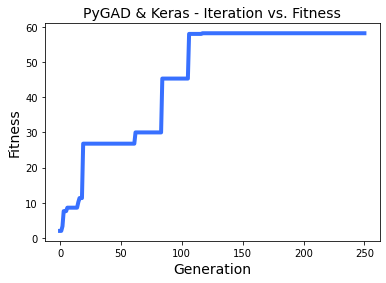

Parameters of the best solution:
[ 0.66219144 -0.84830884  1.4803651  -1.49772193  0.40873459 -0.97108932
  0.564452   -1.52546686 -0.79533716 -0.21871806  0.44932808 -0.54243128
 -0.81374293 -0.06063415  1.04224092  0.33725167 -0.35206032  0.896148
  0.50410843 -0.58603126 -0.91815418  0.14130921 -0.04718    -0.8713133
  0.51653373 -0.47292638  0.62099934 -0.58561206  0.92430453  0.42573404
  0.         -0.50999383 -1.45816069  0.          0.56287778  0.
  0.         -0.05273317  0.29110488 -0.04795302  0.5169521   1.0522768
 -0.5260218  -1.39433847  0.36204118  0.19481497  0.24988598  0.20832807
 -0.13356376 -0.25434753 -0.14029201]

Length of the solution is: 51

Fitness value of the best solution:
58.25320855123074

Predictions:
 [[0.08752961]
 [0.60949343]
 [1.2557738 ]
 [2.5024757 ]]

Correct Outputs:
 [[0.1]
 [0.6]
 [1.3]
 [2.5]]

Absolute Error:
 0.017166426


In [22]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(10, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array([[0.02, 0.1, 0.15],
                           [0.7, 0.6, 0.8],
                           [1.5, 1.2, 1.7],
                           [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = numpy.array([[0.1],
                            [0.6],
                            [1.3],
                            [2.5]])

ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

## Train Keras Classification Model with PyGAD
1. Prepare the training data
2. Build the Keras model
3. Create an instance of the `pygad.kerasga.KerasGA` Class
4. Build the fitness function
5. Create an instance of the `pygad.GA` class
6. Call the `run()` method
7. Plot results
8. Information about the best solution
9. Use the trained model to make predictions
10. Evaluate the model by calculating the error

### 1. Train Data
The example builds the inputs and outputs for an XOR gate

In [23]:
# XOR problem inputs
data_inputs = numpy.array([[0.0, 0.0],
                           [0.0, 1.0],
                           [1.0, 0.0],
                           [1.0, 1.0]])

# XOR problem outputs
data_outputs = numpy.array([[1.0, 0.0],
                            [0.0, 1.0],
                            [0.0, 1.0],
                            [1.0, 0.0]])

### 2. Keras Model
The output layer uses 2 neurons with the `softmax` activation function.

In [24]:
input_layer  = tensorflow.keras.layers.Input(2)
dense_layer = tensorflow.keras.layers.Dense(4, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(2, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

#### Model Summary
The model has 22 trainable parameters.

In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


### 3. Instantiating the `pygad.kerasga.KerasGA` Class

In [26]:
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

### 4. Fitness Function
The binary cross-entropy loss is used. 

In [27]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    error = bce(data_outputs, predictions).numpy()

    fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return fitness

In [28]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

### 5. Instantiating the `pygad.GA` Class

In [29]:
ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

### 6. Call the `run()` Method

In [30]:
ga_instance.run()

Generation = 1
Fitness    = 1.5260079958605703

Generation = 2
Fitness    = 1.5260079958605703

Generation = 3
Fitness    = 1.5260079958605703

Generation = 4
Fitness    = 1.5260079958605703

Generation = 5
Fitness    = 1.5260079958605703

Generation = 6
Fitness    = 1.5260079958605703

Generation = 7
Fitness    = 1.5260079958605703

Generation = 8
Fitness    = 1.8111354191052842

Generation = 9
Fitness    = 1.8111354191052842

Generation = 10
Fitness    = 1.8388593422203554

Generation = 11
Fitness    = 1.8388593422203554

Generation = 12
Fitness    = 1.8388593422203554

Generation = 13
Fitness    = 1.8388593422203554

Generation = 14
Fitness    = 2.002085433796205

Generation = 15
Fitness    = 2.002085433796205

Generation = 16
Fitness    = 2.0592698854107008

Generation = 17
Fitness    = 2.0592698854107008

Generation = 18
Fitness    = 2.0592698854107008

Generation = 19
Fitness    = 2.303919195843592

Generation = 20
Fitness    = 2.303919195843592

Generation = 21
Fitness    = 2.30

Generation = 170
Fitness    = 387.35589624144455

Generation = 171
Fitness    = 387.35589624144455

Generation = 172
Fitness    = 387.35589624144455

Generation = 173
Fitness    = 387.35589624144455

Generation = 174
Fitness    = 387.35589624144455

Generation = 175
Fitness    = 387.35589624144455

Generation = 176
Fitness    = 410.1117734141193

Generation = 177
Fitness    = 410.1117734141193

Generation = 178
Fitness    = 434.4412817909904

Generation = 179
Fitness    = 434.4412817909904

Generation = 180
Fitness    = 448.6223083843638

Generation = 181
Fitness    = 448.6223083843638

Generation = 182
Fitness    = 448.6223083843638

Generation = 183
Fitness    = 448.6223083843638

Generation = 184
Fitness    = 448.6223083843638

Generation = 185
Fitness    = 527.4335468639839

Generation = 186
Fitness    = 527.4335468639839

Generation = 187
Fitness    = 527.4335468639839

Generation = 188
Fitness    = 527.4335468639839

Generation = 189
Fitness    = 527.4335468639839

Generation = 1

### 7. Plot Results

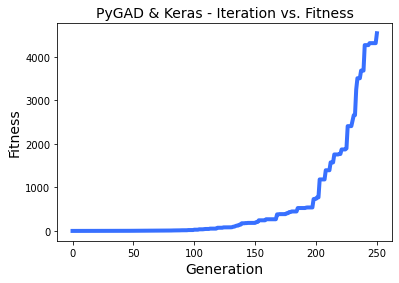

In [31]:
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

### 8. Information about the Best Solution

In [32]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

Parameters of the best solution:
[-0.64548726  1.09038869  4.31730045  1.14331451 -2.47441623 -0.33636812
 -4.55664224 -1.31747928 -0.46394399  0.23681226 -0.04768711  1.20460735
 -2.25445209  1.69917143  2.56652578 -6.13706881 -5.92937333  5.03714812
  4.90281545 -6.43703096 -4.22882097  3.1103047 ]

Length of the solution is: 22

Fitness value of the best solution:
4543.855506078429



### 9. Make Prediction

In [33]:
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

Predictions:
 [[9.9977118e-01 2.2888654e-04]
 [6.4919656e-04 9.9935085e-01]
 [1.1418563e-07 9.9999988e-01]
 [9.9999762e-01 2.3297625e-06]]

Correct Outputs:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]



### 10. Measure the Loss & Accuracy

In [34]:
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(data_outputs, predictions).numpy())

ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

Binary Crossentropy :  0.00022006742
Accuracy :  1.0


## Complete Code for Classification Example

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Generation = 1
Fitness    = 1.6576541764939594

Generation = 2
Fitness    = 1.6576541764939594

Generation = 3
Fitness    = 1.6576541764939594

Generation = 4
Fitness    = 1.6576541764939594

Generation = 5
Fitness    = 1.7570815650728293

Generation = 6
Fitness    = 1.7570815650728293

Generation = 7
Fitness    = 1.7570815650728293

Generation = 8
Fitness    = 1.7879173529697188

Generatio

Generation = 155
Fitness    = 5615.716316742036

Generation = 156
Fitness    = 9003.74833444958

Generation = 157
Fitness    = 9003.74833444958

Generation = 158
Fitness    = 9129.422773206432

Generation = 159
Fitness    = 9129.422773206432

Generation = 160
Fitness    = 9129.422773206432

Generation = 161
Fitness    = 9375.453193792962

Generation = 162
Fitness    = 9375.453193792962

Generation = 163
Fitness    = 9375.453193792962

Generation = 164
Fitness    = 9375.453193792962

Generation = 165
Fitness    = 15403.87310756765

Generation = 166
Fitness    = 15403.87310756765

Generation = 167
Fitness    = 15403.87310756765

Generation = 168
Fitness    = 16073.360202488951

Generation = 169
Fitness    = 16073.360202488951

Generation = 170
Fitness    = 16073.360202488951

Generation = 171
Fitness    = 36726.88342721432

Generation = 172
Fitness    = 36726.88342721432

Generation = 173
Fitness    = 36726.88342721432

Generation = 174
Fitness    = 36726.88342721432

Generation = 175
Fi

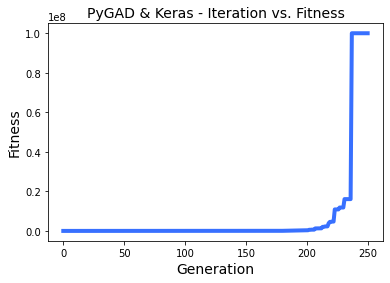

Parameters of the best solution:
[ -3.59167729  -3.73073895   3.35507645  -3.95057762   2.36700901
  -3.71826873  -4.61306302   2.37784903   0.26050484   2.41884262
   0.44031465   0.28824917  -2.02616843   3.62994687   2.02231493
  -4.13669255  -3.6515607    6.32044377   1.18264471   8.81252797
   5.80182292 -10.10042393]

Length of the solution is: 22

Fitness value of the best solution:
100000000.0

Predictions:
 [[1.0000000e+00 1.3357696e-10]
 [4.1452850e-09 1.0000000e+00]
 [2.9459790e-10 1.0000000e+00]
 [9.9999988e-01 1.2409150e-07]]

Correct Outputs:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

Binary Crossentropy :  0.0
Accuracy :  1.0


In [35]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

# XOR problem inputs
data_inputs = numpy.array([[0.0, 0.0],
                           [0.0, 1.0],
                           [1.0, 0.0],
                           [1.0, 1.0]])
    
# XOR problem outputs
data_outputs = numpy.array([[1.0, 0.0],
                            [0.0, 1.0],
                            [0.0, 1.0],
                            [1.0, 0.0]])

input_layer  = tensorflow.keras.layers.Input(2)
dense_layer = tensorflow.keras.layers.Dense(4, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(2, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    error = bce(data_outputs, predictions).numpy()

    fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return fitness

def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

ga_instance.run()

fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(data_outputs, predictions).numpy())

ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)